## Introduction to Neural Networks With Tensorflow

a few types of classification problem 
1. Binary Classification
2. Multiclass Classification
3. Multilabel Classification

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Creating Data to View and Fit

In [ ]:
n_samples=1000
X, y = make_circles(n_samples=n_samples,shuffle=True,noise=0.02, random_state=42)

In [ ]:
X[5]

array([-0.48452681,  0.66063343])

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
circles = pd.DataFrame({"X0": X[:, 0],"X1":X[:,1],"label":y})
circles.head(5)

,X0,X1,label
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0


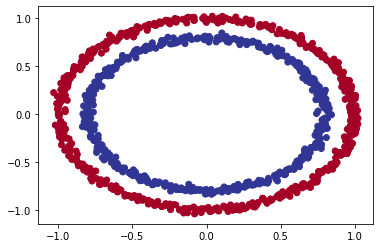

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

## Get the data ready

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train[0], y_train[0]

(array([ 0.64830775, -0.47481654]), 1)

In [ ]:
X_train.shape, y_train.shape

((800, 2), (800,))

## Build a deep learning model

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="softmax"),
    tf.keras.layers.Dense(100, activation="softmax"),
    
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])

model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2  = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="softmax"),
    tf.keras.layers.Dense(100,activation="softmax"),
    tf.keras.layers.Dense(100,activation="softmax"),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])

history = model_2.fit(X_train,y_train,epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/200
25/25 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [ ]:
def plot_decision_boundary(model, X, y):
  X_min, X_max = X[:,0].min()-0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min()-0.1, X[:,1].max() + 0.1
  XX, yy = np.meshgrid(np.linspace(X_min, X_max,100),
                       np.linspace(y_min, y_max))
  x_in = np.c_[XX.ravel(), yy.ravel()]
 
  y_pred = model.predict(x_in)
 
  if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(XX.shape)
  else:
        print("binary classifcation")
        y_pred = np.round(y_pred).reshape(XX.shape)
 
  plt.contourf(XX, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(XX.min(), XX.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
X_min, X_max = X[:,0].min()-0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min()-0.1, X[:,1].max() + 0.1

In [ ]:
X_min, X_max,y_min,y_max

(-1.1311772642021014,
 1.1222376592444214,
 -1.1445211216573197,
 1.123333265815406)

binary classifcation


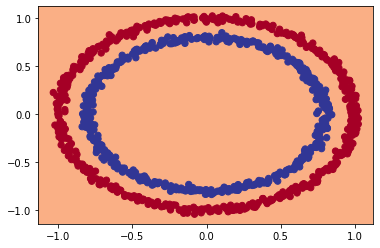

In [ ]:
plot_decision_boundary(model_2,X,y)

In [ ]:
A = tf.cast(tf.range(-10,10),tf.float32)

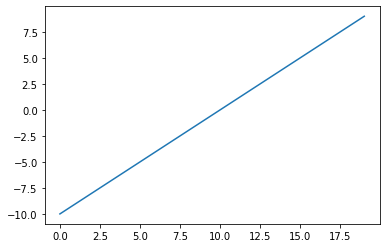

In [ ]:
## Visualize our toy tensor
plt.plot(A)

In [ ]:
def sigmoid(X):
  return 1/(1+tf.exp(-X))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

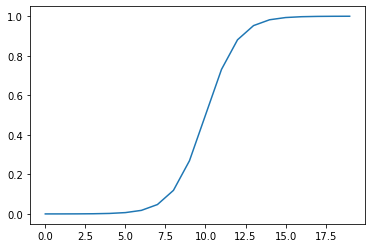

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
## Let's recreate ReLu Function
def relu(x):
	return tf.maximum(0, x)


relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

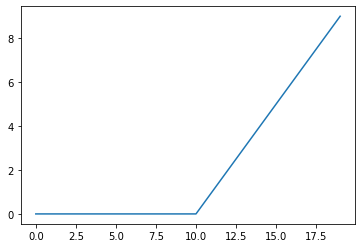

In [ ]:
plt.plot(relu(A))

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
history = model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4888
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5387
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.5163
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5950
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.6388
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.6650
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.6938
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.8650
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.8225
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3924 - accuracy: 0.9250
Epoch 11/

In [ ]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy
0,0.695484,0.48875
1,0.688317,0.53875
2,0.679550,0.51625
3,0.668359,0.59500
4,0.651024,0.63875
...,...,...
95,0.025443,0.99000
96,0.017757,0.99625
97,0.019090,0.99250
98,0.023322,0.99375


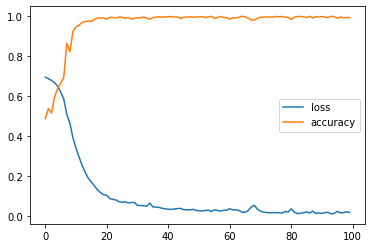

In [ ]:
history_df.plot()

## Finding the ideal learning

We will use a callback function to try and find the ideal learning rate for our model

In [ ]:
model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10**(epoch/20))

history = model_4.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5050 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5025 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5163 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

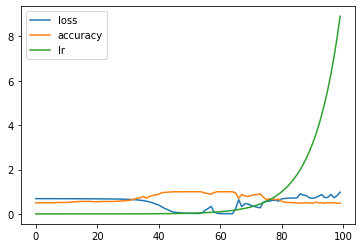

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [ ]:
loss, accuracy = model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9750


In [ ]:
loss, accuracy

(0.06086938828229904, 0.9750000238418579)

In [ ]:
y_preds = model_3.predict(X_test)


In [ ]:
y_preds = np.around(y_preds)

In [ ]:
conf_mx = confusion_matrix(y_test,y_preds)

[Text(0, 0.5, 'True '), Text(0, 1.5, 'False ')]

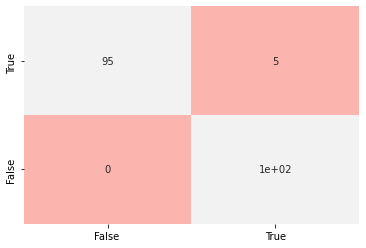

In [ ]:
import seaborn as sns
ax= sns.heatmap(conf_mx,annot=True,cbar=False, cmap="Pastel1")
ax.xaxis.set_ticklabels(["False ","True"])
ax.yaxis.set_ticklabels(["True ","False "])

## Multiclass Classification

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_images.ndim, test_images.ndim

(3, 3)

In [ ]:
train_images[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

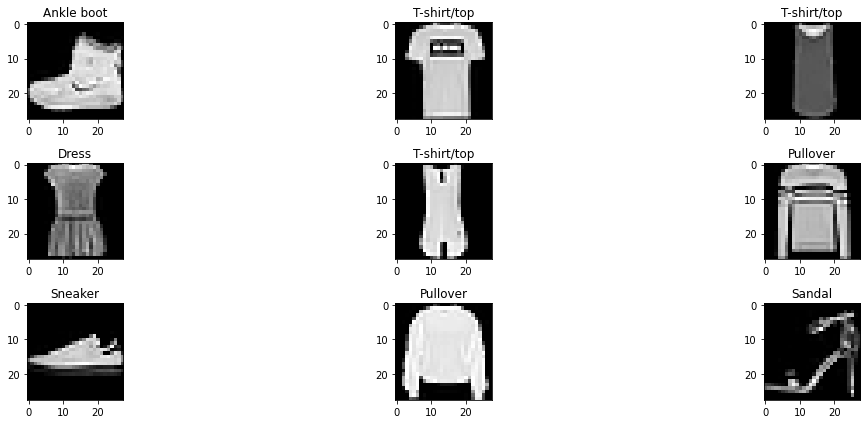

In [ ]:
plt.figure(figsize=(18,6))
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.title(class_names[train_labels[i]])
plt.tight_layout()    
plt.show()

In [ ]:
## build a model
tf.random.set_seed(42)
INPUT_SHAPE= 28*28
OUTPUT_SHAPE = 10
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(OUTPUT_SHAPE,activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"],optimizer=tf.keras.optimizers.Adam())
model_1.fit(train_images,train_labels,epochs=100,validation_data=(test_images,test_labels))

Epoch 1/100
1875/1875 [==============================] - 8s 3ms/step - loss: 2.3129 - accuracy: 0.7129 - val_loss: 0.7483 - val_accuracy: 0.7355
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6782 - accuracy: 0.7722 - val_loss: 0.7002 - val_accuracy: 0.7788
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6373 - accuracy: 0.7893 - val_loss: 0.6878 - val_accuracy: 0.7614
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5762 - accuracy: 0.8063 - val_loss: 0.6051 - val_accuracy: 0.7896
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5374 - accuracy: 0.8164 - val_loss: 0.5777 - val_accuracy: 0.8169
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4924 - accuracy: 0.8292 - val_loss: 0.5862 - val_accuracy: 0.7928
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4635 - accuracy: 0.8392 - val_loss: 0.4898 - val_ac

In [ ]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               78500     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


## Normalizing our data

In [ ]:
train_images_norm = train_images/255.0

In [ ]:
test_images_norm = test_images/255.0

In [ ]:
train_images_norm.min(), train_images_norm.max()

(0.0, 1.0)

In [ ]:
## Let's build another model to see how our model perform on normalized data
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
norm_history=model_2.fit(train_images_norm,train_labels,epochs=100,validation_data=(test_images_norm,test_labels))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4932 - accuracy: 0.8242 - val_loss: 0.4155 - val_accuracy: 0.8471
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3691 - accuracy: 0.8643 - val_loss: 0.4402 - val_accuracy: 0.8480
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3334 - accuracy: 0.8771 - val_loss: 0.3799 - val_accuracy: 0.8599
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3104 - accuracy: 0.8863 - val_loss: 0.3812 - val_accuracy: 0.8599
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2933 - accuracy: 0.8902 - val_loss: 0.3587 - val_accuracy: 0.8670
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2775 - accuracy: 0.8955 - val_loss: 0.3747 - val_accuracy: 0.8567
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2651 - accuracy: 0.9008 - val_loss: 0.3645 - val_ac

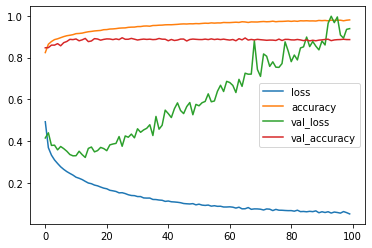

In [ ]:
history_df = pd.DataFrame(norm_history.history)
history_df.plot()

## Finding the ideal learning rate

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(OUTPUT_SHAPE,activation="softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3*10**(epochs/20))
lr_history = model_3.fit(train_images_norm,train_labels,epochs=100,validation_data=(test_images_norm,test_labels),callbacks=[lr_scheduler])

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4896 - accuracy: 0.8263 - val_loss: 0.4090 - val_accuracy: 0.8511 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3711 - accuracy: 0.8645 - val_loss: 0.4391 - val_accuracy: 0.8468 - lr: 0.0011
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3413 - accuracy: 0.8748 - val_loss: 0.3854 - val_accuracy: 0.8565 - lr: 0.0013
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3223 - accuracy: 0.8815 - val_loss: 0.3816 - val_accuracy: 0.8629 - lr: 0.0014
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3102 - accuracy: 0.8851 - val_loss: 0.3699 - val_accuracy: 0.8649 - lr: 0.0016
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3027 - accuracy: 0.8874 - val_loss: 0.4035 - val_accuracy: 0.8462 - lr: 0.0018
Epoch 7/100
1875/1875 [=============================

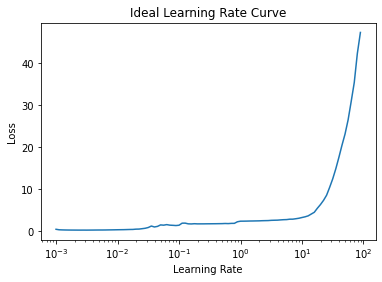

In [ ]:
lrs = 1e-3*(10**(tf.range(100)/20))
plt.semilogx(lrs,lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Ideal Learning Rate Curve")
plt.show()

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(OUTPUT_SHAPE,activation="softmax")
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=10**-2),metrics=["accuracy"])

lr_history = model_4.fit(train_images_norm,train_labels,epochs=100,validation_data=(test_images_norm,test_labels))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5478 - accuracy: 0.8039 - val_loss: 0.5225 - val_accuracy: 0.8171
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4480 - accuracy: 0.8404 - val_loss: 0.5399 - val_accuracy: 0.8151
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4200 - accuracy: 0.8517 - val_loss: 0.4471 - val_accuracy: 0.8367
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4061 - accuracy: 0.8546 - val_loss: 0.4609 - val_accuracy: 0.8419
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3964 - accuracy: 0.8586 - val_loss: 0.4363 - val_accuracy: 0.8479
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3870 - accuracy: 0.8616 - val_loss: 0.4835 - val_accuracy: 0.8316
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3870 - accuracy: 0.8620 - val_loss: 0.4534 - val_ac

In [ ]:
test_probs = model_4.predict(test_images_norm)

In [ ]:
test_probs

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0020319e-02,
        2.9837134e-19, 9.8996896e-01],
       [2.3148725e-12, 1.4118454e-19, 9.9828631e-01, ..., 0.0000000e+00,
        7.1580081e-17, 0.0000000e+00],
       [2.4390621e-29, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [9.4438445e-19, 1.0000000e+00, 3.0908439e-31, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
test_probs[0],class_names[tf.argmax(test_probs[0])]

(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0675717e-05, 0.0000000e+00, 1.0020319e-02,
        2.9837134e-19, 9.8996896e-01], dtype=float32), 'Ankle boot')

In [ ]:
test_probs[1], class_names[tf.argmax(test_probs[1])]

(array([2.31487247e-12, 1.41184544e-19, 9.98286307e-01, 5.86891130e-17,
        1.71362329e-03, 0.00000000e+00, 1.34202445e-08, 0.00000000e+00,
        7.15800809e-17, 0.00000000e+00], dtype=float32), 'Pullover')

In [ ]:
test_preds = test_probs.argmax(axis=1)

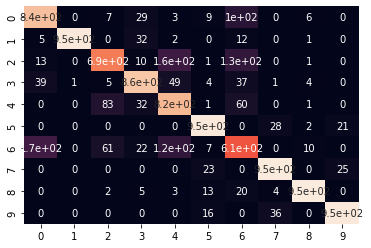

In [ ]:
import seaborn as sns
conf_mx = confusion_matrix(test_labels,test_preds)
sns.heatmap(conf_mx,annot=True,cbar=False)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,test_preds)

0.8581

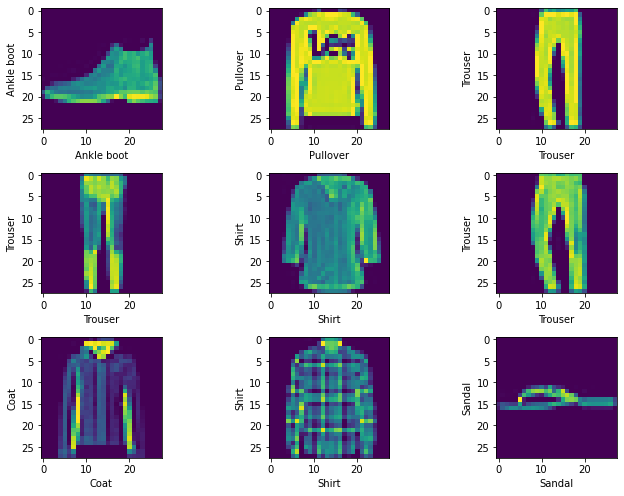

In [ ]:
plt.figure(figsize=(10,7))
for i in range(0,9):
  plt.subplot(330+1+i)
  plt.imshow(test_images[i])
  plt.xlabel(class_names[test_labels[i]])
  plt.ylabel(class_names[test_preds[i]])
plt.tight_layout()  

## Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [ ]:
X, y = make_moons(1000,shuffle=True,noise=0.5)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
moons=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Labels":y})

In [ ]:
moons

,X0,X1,Labels
0,0.059732,0.564761,0
1,1.761191,-0.590276,1
2,0.450947,-0.345897,0
3,1.617655,-0.302221,1
4,0.349802,0.026078,1
...,...,...,...
995,-0.606764,0.603308,0
996,-1.374280,0.109600,0
997,-0.763163,0.527292,0
998,0.421657,0.114048,1


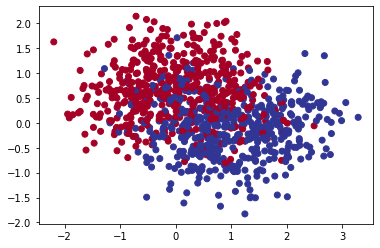

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((800, 2), (200, 2))

In [ ]:
#Build a model
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs:1e-3*10**(epochs/20))
history = model_1.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7588 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8100 - lr: 0.0011
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8238 - lr: 0.0013
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8200 - lr: 0.0014
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8250 - lr: 0.0016
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8225 - lr: 0.0018
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8188 - lr: 0.0020
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8250 - lr: 0.0022
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8250 - lr:

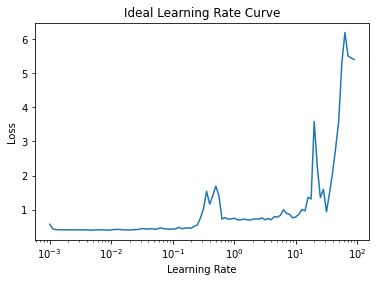

In [ ]:
lrs = 1e-3*(10**(tf.range(100)/20))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Ideal Learning Rate Curve")
plt.show()

In [ ]:
## Model with ideal learning rate
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=10**-2),metrics=["accuracy"])
history = model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.4486 - accuracy: 0.7975
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.8112
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8138
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4048 - accuracy: 0.8275
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8238
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.8313
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8275
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4052 - accuracy: 0.8238
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3975 - accuracy: 0.8288
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8363
Epoch 11/

binary classifcation


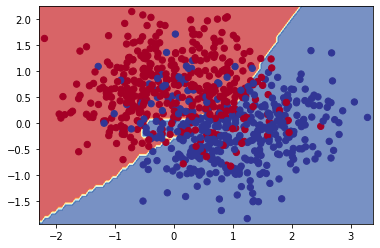

In [ ]:
plot_decision_boundary(model_2,X_train,y_train)